<a href="https://colab.research.google.com/github/Knaut-007/GeneticAlgorithm-VRP/blob/main/src/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install necessary packages
!pip install matplotlib deap numpy


In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


In [7]:
# How many places to visit (not counting the depot)
num_locations = 10

# How many vehicles will do the deliveries
num_vehicles = 3

# Random locations on a 100x100 grid
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]

# Depot at the center
depot = (50, 50)

# Show depot and all locations
print("Depot:", depot)
print("Locations:", locations)


Depot: (50, 50)
Locations: [(86, 76), (98, 95), (60, 77), (62, 70), (80, 39), (20, 35), (6, 50), (13, 100), (87, 54), (3, 5)]


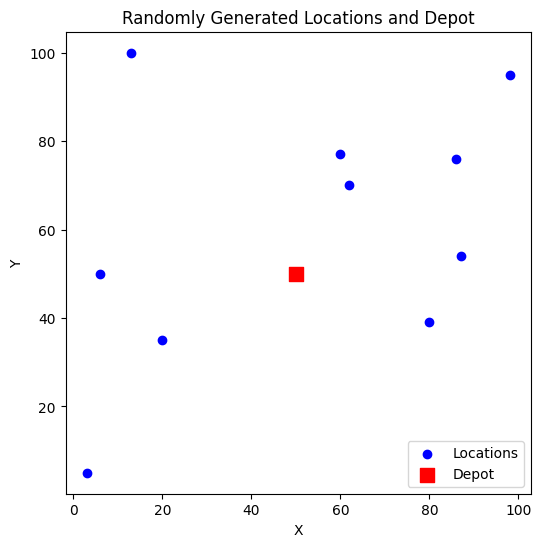

In [8]:
plt.figure(figsize=(6, 6))
x, y = zip(*locations)
plt.scatter(x, y, c='blue', label='Locations')
plt.scatter(*depot, c='red', marker='s', s=100, label='Depot')
plt.title('Randomly Generated Locations and Depot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
